# Morphological Opening and Closing

Morphological operations are useful in **noise removal**, **object separation**, and **shape refinement**. Two important composite operations are **Opening** and **Closing**, which are built from basic **erosion** and **dilation**.

## 1. Opening (Erosion → Dilation)
- **Definition**: Opening is the process of first applying erosion and then dilation using the same structuring element.  
- **Purpose**:  
  - Removes small objects (noise) from the foreground.  
  - Preserves the overall shape and size of larger objects.  
- **Effect**: Breaks narrow connections and smooths object boundaries.  

$$
\\text{Opening: } A \\circ B = (A \\ominus B) \\oplus B
$$

## 2. Closing (Dilation → Erosion)
- **Definition**: Closing is the process of first applying dilation and then erosion using the same structuring element.  
- **Purpose**:  
  - Fills small holes and gaps inside foreground objects.  
  - Connects nearby objects that are close together.  
- **Effect**: Smooths contours but tends to fuse adjacent objects.  

$$
\\text{Closing: } A \\bullet B = (A \\oplus B) \\ominus B
$$

---

## Side-by-Side Visualization

In the subplot visualization:  

- **Original Image** → Base image used for comparison.  
- **Opening Result** → Shows removal of small noise and thinning of narrow parts.  
- **Closing Result** → Shows filling of small holes and connection of nearby structures.  

By comparing them side by side, you can see that:  
- **Opening is better for noise removal** while preserving larger shapes.  
- **Closing is better for filling gaps and connecting components** without removing main objects.  
"""

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Read Images ---
image1 = cv2.imread("assets/Coin.png")
image2 = cv2.imread("assets/Generative AI.png")
image3 = cv2.imread("assets/Circle.png")
image4 = cv2.imread("assets/Open CV.png")

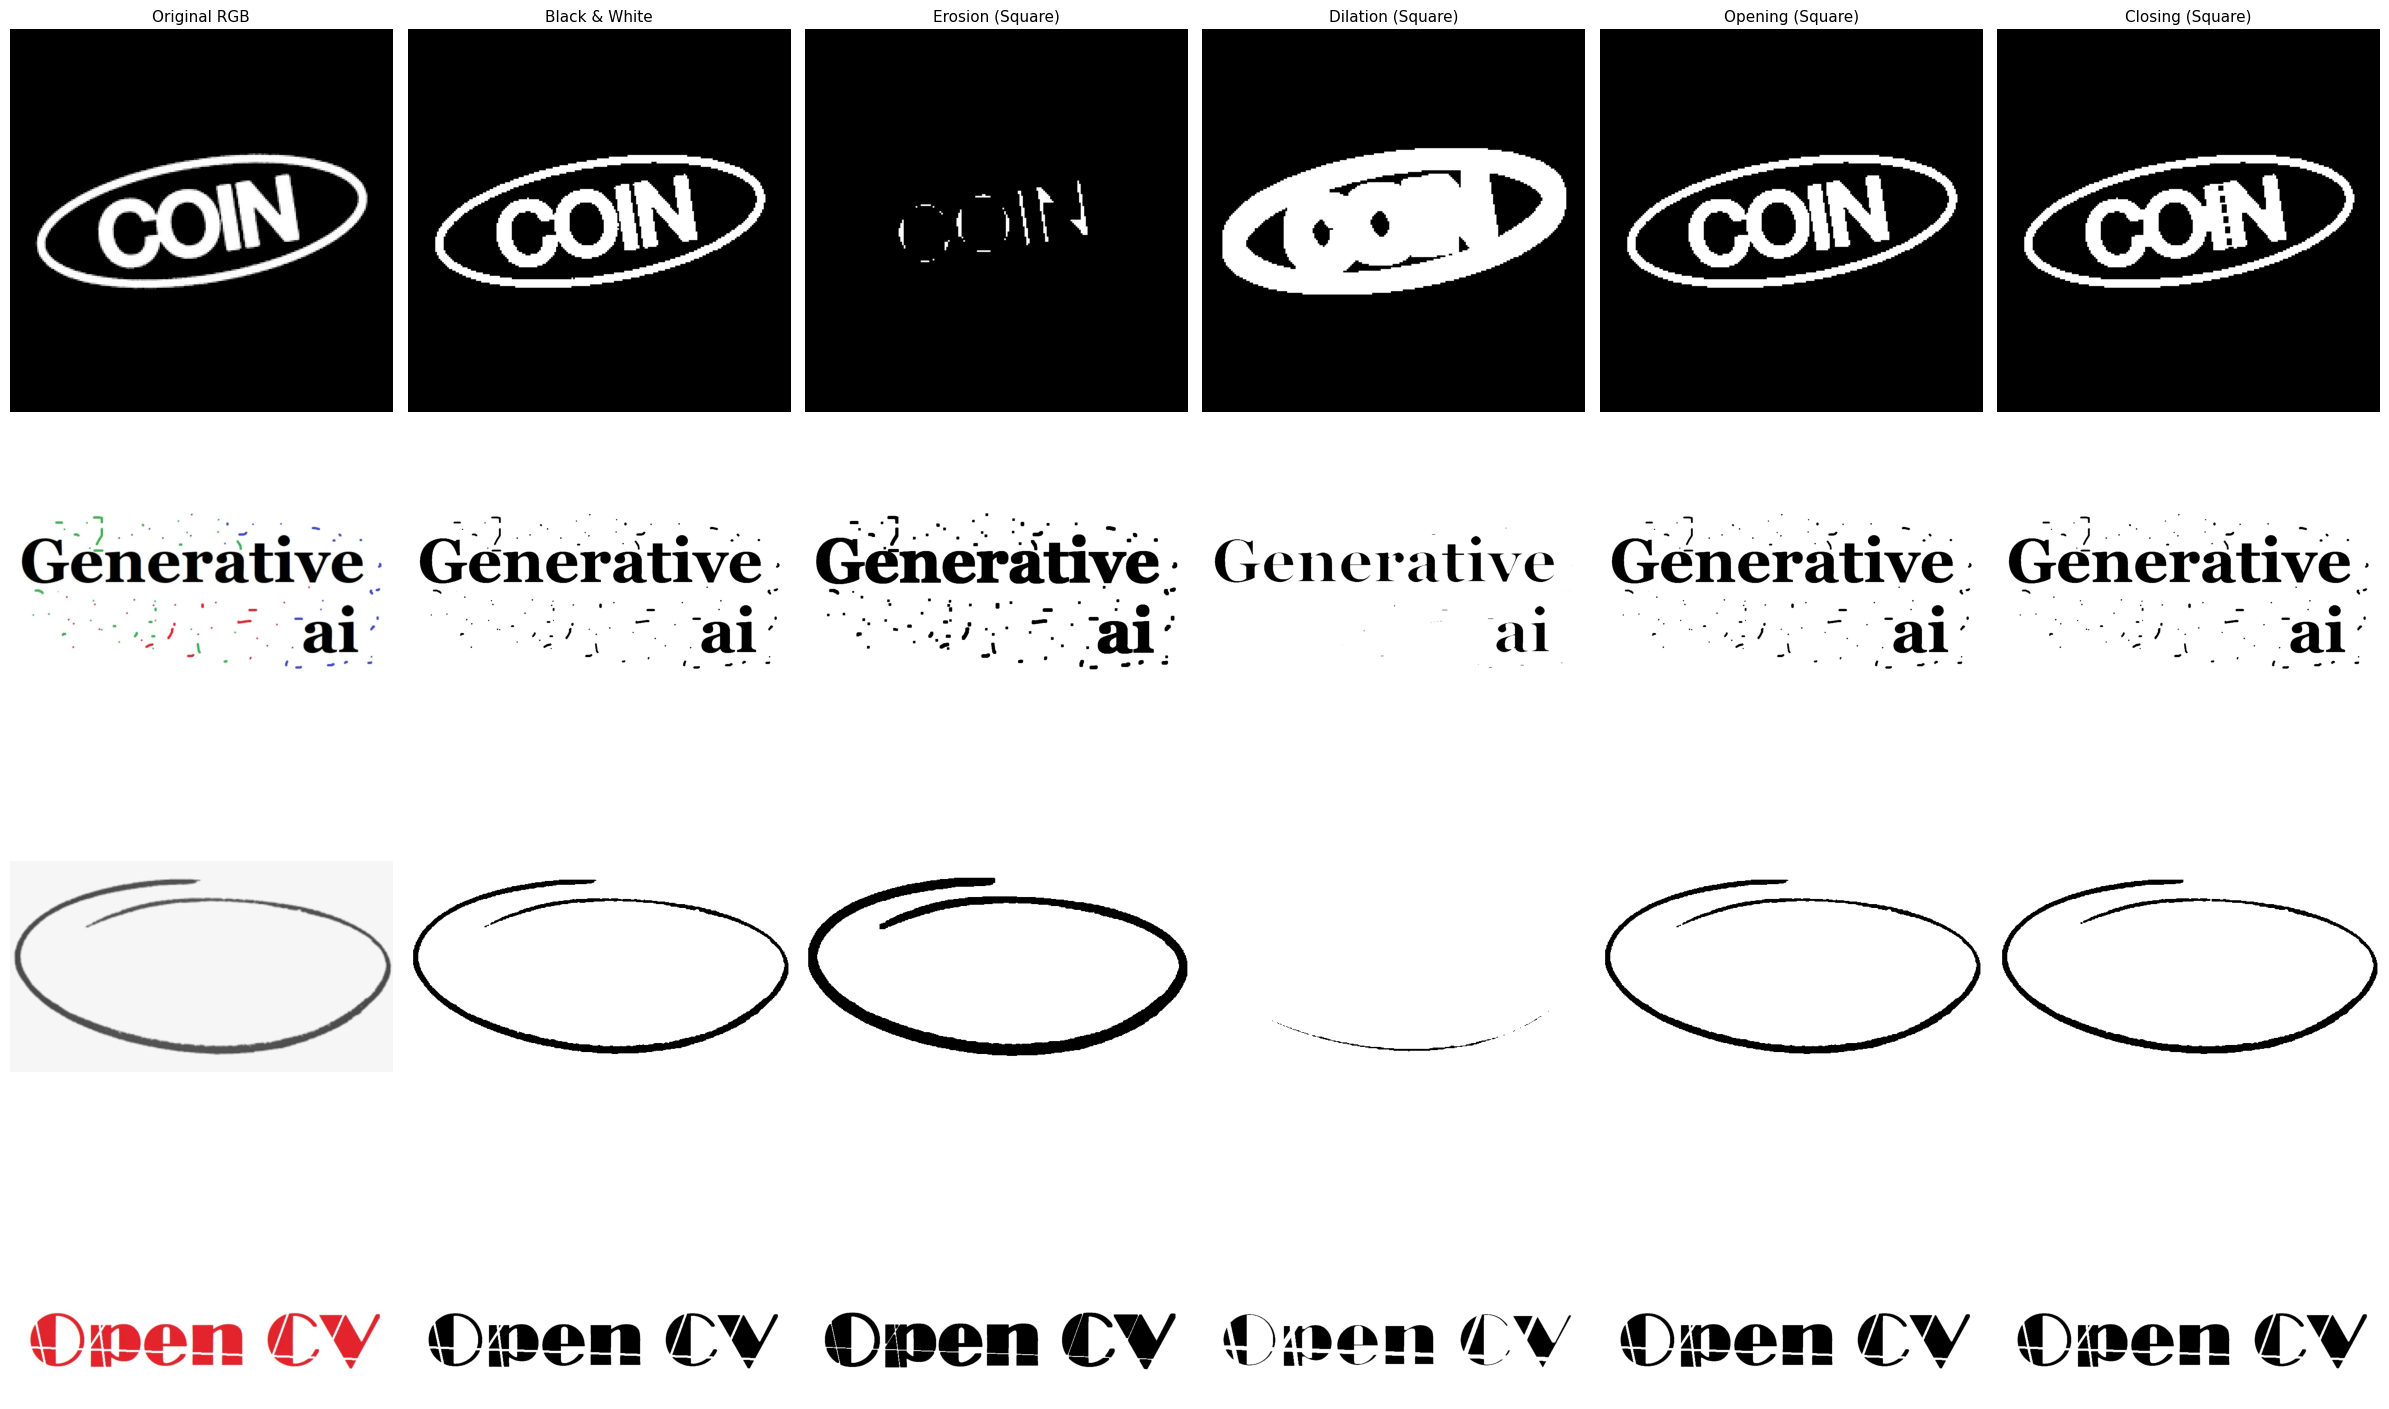

In [7]:
def process_image_with_kernels(image, T=150):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define manual kernels
    kernels = {
        "Square": np.array([[1,1,1],
                            [1,1,1],
                            [1,1,1]], dtype=np.uint8),
    }
    
    results = {}
    
    for kname, kernel in kernels.items():
        erosion  = cv2.erode(bw, kernel, iterations=3)
        dilation = cv2.dilate(bw, kernel, iterations=4)
        opening  = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
        closing  = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
        results[kname] = (erosion, dilation, opening, closing)
    
    return gray, bw, results


# --- Process all four images ---
gray1, bw1, results1 = process_image_with_kernels(image1)
gray2, bw2, results2 = process_image_with_kernels(image2)
gray3, bw3, results3 = process_image_with_kernels(image3)
gray4, bw4, results4 = process_image_with_kernels(image4)

# --- Visualization ---
# Columns: Original, BW, Erosion, Dilation, Opening, Closing (6 cols)
fig, axes = plt.subplots(4, 6, figsize=(24, 16))  # 4 rows for 4 images

titles = [
    "Original RGB",
    "Black & White",
    "Erosion (Square)",
    "Dilation (Square)",
    "Opening (Square)",
    "Closing (Square)"
]

# Function to plot results for one row using Square kernel
def plot_row(ax_row, image, bw, results):
    ax_row[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax_row[1].imshow(bw, cmap="gray")
    ax_row[2].imshow(results["Square"][0], cmap="gray")   # erosion
    ax_row[3].imshow(results["Square"][1], cmap="gray")   # dilation
    ax_row[4].imshow(results["Square"][2], cmap="gray")   # opening
    ax_row[5].imshow(results["Square"][3], cmap="gray")   # closing

# Plot for 4 images
plot_row(axes[0], image1, bw1, results1)
plot_row(axes[1], image2, bw2, results2)
plot_row(axes[2], image3, bw3, results3)
plot_row(axes[3], image4, bw4, results4)  # fixed row index

# Titles only on first row
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=11)

# Remove axis ticks
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()